In [28]:
import pandas as pd
import numpy as np

from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from acquire_timeseries import acquire_timeseries

In [29]:
ds_group_ts = acquire_timeseries(
    input_csv='group_samples/group_popularity_until_13.02.2023.csv',
    input_format='DAOD',  # AOD
    input_subformat='SUSY',  # TOPQ HIGG SUSY PHYS
    input_project='mc16_13TeV'  # data16_13TeV
)
ds_group_ts

2018-01-01     102
2018-01-08     694
2018-01-15    1445
2018-01-22    1041
2018-01-29    1315
              ... 
2023-01-16     443
2023-01-23     790
2023-01-30    2472
2023-02-06     907
2023-02-13     775
Length: 268, dtype: int64

<AxesSubplot: >

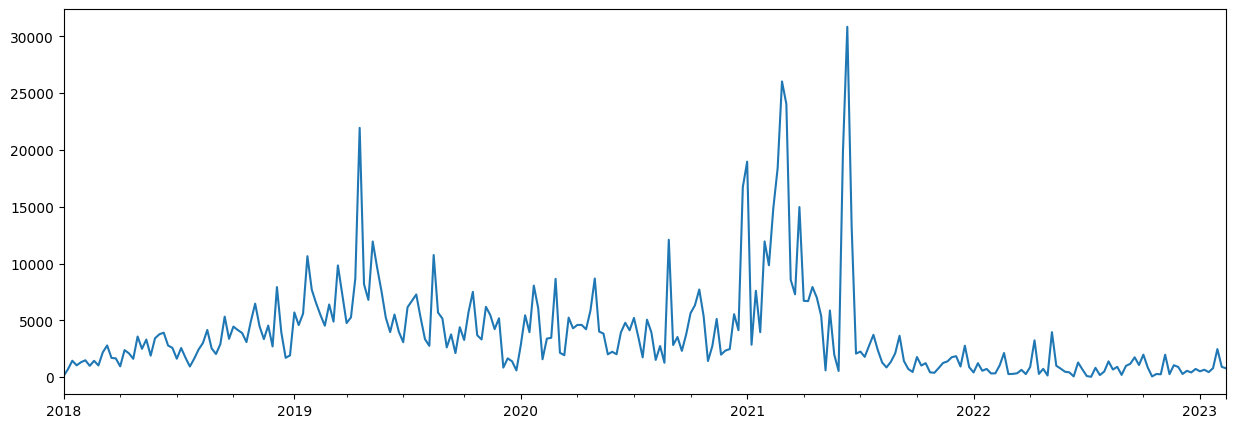

In [30]:
ds_group_ts.plot(figsize=(15, 5))

In [31]:
df = pd.DataFrame({'ds' : ds_group_ts.index, 'y' : np.log(ds_group_ts + 1)})
df

,ds,y
2018-01-01,2018-01-01,4.634729
2018-01-08,2018-01-08,6.543912
2018-01-15,2018-01-15,7.276556
2018-01-22,2018-01-22,6.948897
2018-01-29,2018-01-29,7.182352
...,...,...
2023-01-16,2023-01-16,6.095825
2023-01-23,2023-01-23,6.673298
2023-01-30,2023-01-30,7.813187
2023-02-06,2023-02-06,6.811244


In [32]:
m = Prophet(yearly_seasonality=True,
            changepoint_prior_scale=0.05)
m.fit(df)

17:25:48 - cmdstanpy - INFO - Chain [1] start processing
17:25:48 - cmdstanpy - INFO - Chain [1] done processing


In [33]:
cutoffs = pd.to_datetime(['2020-01-01', '2021-01-01', '2022-01-01'])
cutoffs

DatetimeIndex(['2020-01-01', '2021-01-01', '2022-01-01'], dtype='datetime64[ns]', freq=None)

In [34]:
df_cv = cross_validation(m, horizon='84 days', initial='730 days', cutoffs=cutoffs)
df_cv

  0%|          | 0/3 [00:00<?, ?it/s]

17:25:48 - cmdstanpy - INFO - Chain [1] start processing
17:25:48 - cmdstanpy - INFO - Chain [1] done processing
17:25:48 - cmdstanpy - INFO - Chain [1] start processing
17:25:48 - cmdstanpy - INFO - Chain [1] done processing
17:25:48 - cmdstanpy - INFO - Chain [1] start processing
17:25:48 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-01-06,7.345017,6.862850,7.821081,7.939159,2020-01-01
1,2020-01-13,7.948902,7.488491,8.398327,8.602820,2020-01-01
2,2020-01-20,8.454339,8.017562,8.905749,8.283241,2020-01-01
3,2020-01-27,8.617613,8.165855,9.100760,8.994793,2020-01-01
4,2020-02-03,8.455786,7.967879,8.896677,8.713911,2020-01-01
5,2020-02-10,8.189839,7.711988,8.660282,7.363280,2020-01-01
6,2020-02-17,8.051674,7.583234,8.538618,8.129764,2020-01-01
7,2020-02-24,8.123955,7.653396,8.618090,8.151045,2020-01-01
8,2020-03-02,8.315021,7.849088,8.785260,9.065892,2020-01-01
9,2020-03-09,8.454118,7.968536,8.930520,7.671827,2020-01-01


In [35]:
# df_p = performance_metrics(df_cv)
# df_p

In [36]:
df_p = performance_metrics(df_cv, rolling_window=1)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,82 days,1.33032,1.153395,0.936254,0.12849,0.093946,0.121453,0.388889
